In [2]:
import pandas as pd

In [3]:
data=pd.read_csv("C:/Users/Hp/Desktop/SELFMADE DATA/balanced_data_752.csv")

In [4]:
data.duplicated().any().any()

False

In [5]:
data.isnull().any().any()

False

<function matplotlib.pyplot.show(close=None, block=None)>

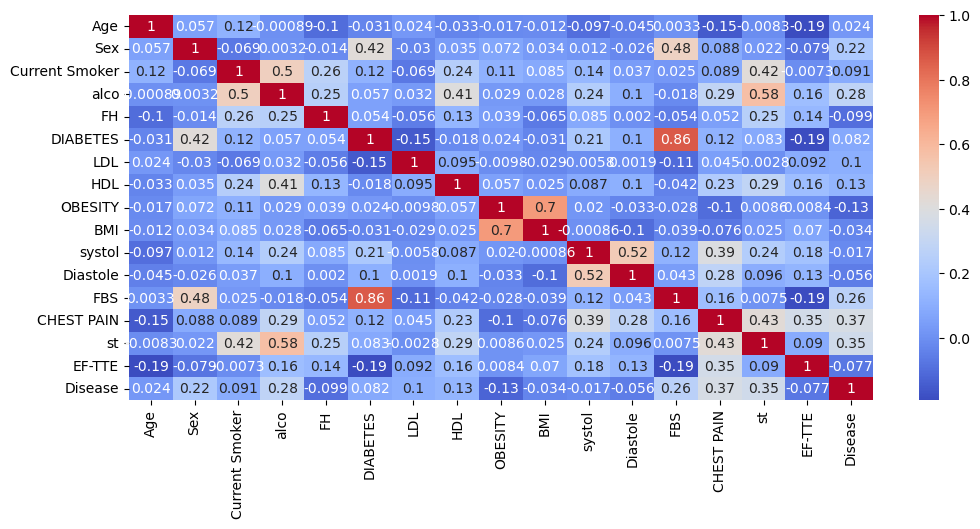

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
R=plt.figure(figsize=(12,5))
sns.heatmap(data.corr("spearman"),annot=True,cmap='coolwarm')
plt.show

In [7]:

import numpy as np
pearson_corr = data.corr(method='pearson')

upper_triangle = pearson_corr.where(np.triu(np.ones(pearson_corr.shape), k=1).astype(bool))
# Define a threshold for high correlation (e.g., 0.85)
threshold = 0.50

# Find columns to drop
columns_to_drop = set()
for col in upper_triangle.columns:
    # If any feature in a column is correlated above the threshold, mark it for removal
    if any(upper_triangle[col] > threshold):
        columns_to_drop.add(col)

print(len(columns_to_drop))
#Drop the highly correlated columns
final_data_reduced = data.drop(columns=columns_to_drop)

print(f"Features dropped: {columns_to_drop}")


3
Features dropped: {'FBS', 'st', 'BMI'}


In [8]:
data.drop(['BMI','FBS','st'],axis=1,inplace=True)

In [9]:
data.columns

Index(['Age', 'Sex', 'Current Smoker', 'alco', 'FH', 'DIABETES', 'LDL', 'HDL',
       'OBESITY', 'systol', 'Diastole', 'CHEST PAIN', 'EF-TTE', 'Disease'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

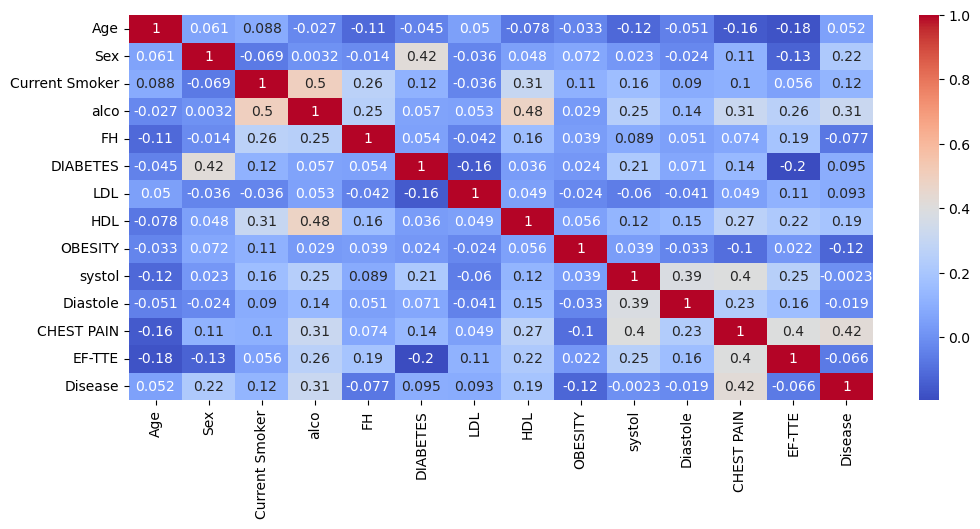

In [10]:
R=plt.figure(figsize=(12,5))
sns.heatmap(data.corr("pearson"),annot=True,cmap='coolwarm')
plt.show

In [11]:
x=data.drop('Disease',axis=1)
y=data['Disease']

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=43)



In [13]:
from sklearn.preprocessing import StandardScaler

sc= StandardScaler()
x_scale_train = sc.fit_transform(x_train)
x_scale_test = sc.transform(x_test)

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

gb=GradientBoostingClassifier(n_estimators=18,
    learning_rate=0.02,
    max_depth=17,
    subsample=0.6,random_state=43)
gb.fit(x_scale_train,y_train)
train_prediction=gb.predict(x_scale_train)

test_prediction=gb.predict(x_scale_test)


print("The R^2 score  on train data is:", metrics.accuracy_score(y_train, train_prediction))



print("The R^2 score  on test data is:", metrics.accuracy_score(y_test, test_prediction))

print("Precision:", metrics.precision_score(y_test, test_prediction, average="weighted"))
print("Recall:", metrics.recall_score(y_test, test_prediction, average="weighted"))


The R^2 score  on train data is: 0.998272884283247
The R^2 score  on test data is: 0.8896551724137931
Precision: 0.8898982928486495
Recall: 0.8896551724137931


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf=RandomForestClassifier(random_state=43,criterion="entropy",max_depth=150,bootstrap=False,
    min_samples_split=4,
    min_samples_leaf=2,n_estimators=1370)
rf.fit(x_scale_train,y_train)
train_prediction=rf.predict(x_scale_train)

test_prediction=rf.predict(x_scale_test)


print("The R^2 score  on train data is:",metrics.accuracy_score(y_train, train_prediction))

print("The R^2 score  on test data is:",metrics.accuracy_score(y_test, test_prediction))
print("Precision:", metrics.precision_score(y_test, test_prediction, average="weighted"))
print("Recall:", metrics.recall_score(y_test, test_prediction, average="weighted"))


The R^2 score  on train data is: 0.998272884283247
The R^2 score  on test data is: 0.896551724137931
Precision: 0.9022577996715928
Recall: 0.896551724137931


In [16]:
from lightgbm import LGBMClassifier
lg= LGBMClassifier(random_state=43,num_leaves=310,learning_rate=0.06, n_estimators=789)
lg.fit(x_scale_train,y_train)
train_prediction=lg.predict(x_scale_train)

test_prediction=lg.predict(x_scale_test)
print("The R^2 score  on train data is:", metrics.accuracy_score(y_train, train_prediction))
print("The R^2 score  on test data is:", metrics.accuracy_score(y_test, test_prediction))
print("Precision:", metrics.precision_score(y_test, test_prediction, average="weighted"))
print("Recall:", metrics.recall_score(y_test, test_prediction, average="weighted"))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 375
[LightGBM] [Info] Number of data points in the train set: 579, number of used features: 13
[LightGBM] [Info] Start training from score -1.130194
[LightGBM] [Info] Start training from score -1.434049
[LightGBM] [Info] Start training from score -1.557281
[LightGBM] [Info] Start training from score -1.478501
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

In [17]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import metrics

# Define the kernel
kernel = 1.0 * RBF(1.0)

# Instantiate the classifier correctly
gpc = GaussianProcessClassifier(kernel=kernel, multi_class='one_vs_rest', random_state=43)

# Fit the model
gpc.fit(x_scale_train, y_train)

# Make predictions
train_prediction = gpc.predict(x_scale_train)
test_prediction = gpc.predict(x_scale_test)

# Classification Metrics
print("Accuracy on train data:", metrics.accuracy_score(y_train, train_prediction))
print("Accuracy on test data:", metrics.accuracy_score(y_test, test_prediction))

# Confusion Matrix and Classification Report
#print("\nConfusion Matrix:\n", metrics.confusion_matrix(y_test, test_prediction))
print("Precision:", metrics.precision_score(y_test, test_prediction, average="weighted"))
print("Recall:", metrics.recall_score(y_test, test_prediction, average="weighted"))




Accuracy on train data: 0.9620034542314335
Accuracy on test data: 0.8620689655172413
Precision: 0.8786880786373688
Recall: 0.8620689655172413


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k=KNeighborsClassifier(n_neighbors=2)
k.fit(x_scale_train,y_train)
train_prediction=k.predict(x_scale_train)

test_prediction=k.predict(x_scale_test)


print("The R^2 score  on train data is:", metrics.accuracy_score(y_train, train_prediction))



print("The R^2 score  on test data is:", metrics.accuracy_score(y_test, test_prediction))
print("Precision:", metrics.precision_score(y_test, test_prediction, average="weighted"))
print("Recall:", metrics.recall_score(y_test, test_prediction, average="weighted"))



The R^2 score  on train data is: 0.92573402417962
The R^2 score  on test data is: 0.7655172413793103
Precision: 0.7750985221674876
Recall: 0.7655172413793103


In [19]:
import xgboost 
from xgboost import XGBClassifier
from sklearn import metrics
X=XGBClassifier(criterion="gini",max_depth=3,

   random_state=43,n_estimators=789,ets=0.05)
X.fit(x_scale_train,y_train)
train_prediction=X.predict(x_scale_train)

test_prediction=X.predict(x_scale_test)


print("The R^2 score  on train data is:", metrics.accuracy_score(y_train, train_prediction))



print("The R^2 score  on test data is:", metrics.accuracy_score(y_test, test_prediction))
print("Precision:", metrics.precision_score(y_test, test_prediction, average="weighted"))
print("Recall:", metrics.recall_score(y_test, test_prediction, average="weighted"))



c:\Users\Hp\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:22:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "criterion", "ets" } are not used.

  warnings.warn(smsg, UserWarning)


The R^2 score  on train data is: 1.0
The R^2 score  on test data is: 0.9241379310344827
Precision: 0.9259822361546498
Recall: 0.9241379310344827


In [20]:
from sklearn.metrics import classification_report
y_pred_train = gpc.predict(x_scale_train)
print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

           0       0.99      0.96      0.97       187
           1       0.92      0.96      0.94       138
           2       0.93      0.93      0.93       122
           3       1.00      0.99      1.00       132

    accuracy                           0.96       579
   macro avg       0.96      0.96      0.96       579
weighted avg       0.96      0.96      0.96       579



In [21]:
from sklearn.metrics import classification_report
y_test_pred = gpc.predict(x_scale_test)
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       0.98      0.79      0.88        63
           1       0.76      0.90      0.82        31
           2       0.79      0.93      0.85        28
           3       0.88      0.91      0.89        23

    accuracy                           0.86       145
   macro avg       0.85      0.88      0.86       145
weighted avg       0.88      0.86      0.86       145



In [22]:

train_df=pd.DataFrame(x_scale_train,columns=x.columns)
pd.DataFrame(x_scale_test,columns=x.columns)
test_df=pd.DataFrame(x_scale_test,columns=x.columns)
concatenated_df = pd.concat([train_df,test_df], axis=0, ignore_index=True)

In [23]:
concatenated_df.shape

(724, 13)

In [24]:
drugs=pd.read_csv("C:/Users/Hp/Downloads/CVD_drugs_one_hot_encoded.csv")

In [25]:
concat_data=pd.concat([concatenated_df,drugs],axis=1)

In [26]:
concatenated_df=pd.read_csv("C:/Users/Hp/Desktop/SELFMADE DATA/cardio_encoded.csv")

In [27]:
concatenated_df.drop(['FBS','BMI','st'],axis=1,inplace=True)

In [28]:
concatenated_df

,Age,Sex,Current Smoker,alco,FH,DIABETES,LDL,HDL,OBESITY,systol,Diastole,CHEST PAIN,EF-TTE,CAD,Heart Failure,Heart Attack
0,58,1,1,0,0,1,66,39,0,121,79,1,25,0,1,0
1,70,1,1,0,0,1,112,44,0,101,77,1,45,0,1,0
2,70,0,0,0,0,0,110,39,1,121,79,1,25,0,1,0
3,80,1,0,0,0,1,131,35,0,121,79,1,20,0,1,0
4,50,1,0,0,0,0,70,40,0,120,80,2,50,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
719,50,0,1,1,0,0,110,93,0,120,89,2,50,0,0,1
720,77,0,1,1,0,0,113,74,1,124,80,2,50,0,0,1
721,41,1,0,1,0,1,89,52,0,174,90,3,50,0,0,1
722,30,1,0,1,1,1,110,75,0,121,80,3,50,0,0,1


In [29]:
print(concatenated_df['Heart Attack'].value_counts())
print(concatenated_df['Heart Failure'].value_counts())
print(concatenated_df['CAD'].value_counts())


Heart Attack
0    569
1    155
Name: count, dtype: int64
Heart Failure
0    574
1    150
Name: count, dtype: int64
CAD
0    555
1    169
Name: count, dtype: int64


In [32]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# OneHotEncoder setup (Ensure consistent encoding across training & prediction)
encoder = OneHotEncoder(categories=[np.array([0, 1, 2, 3])], sparse_output=False)
encoder.fit(np.array([0, 1, 2, 3]).reshape(-1, 1))  # Fit on all possible classes

# Ensure `expected_columns` does not include 'Disease'
expected_columns = [col for col in data.columns if col != 'Disease']

# Function to get user input
def get_user_input(sc, expected_columns):
    user_data = {
        'Age': float(input("Enter Age: ")),
        'Sex': int(input("Enter Sex (0 for Male, 1 for Female): ")),
        'Current Smoker': int(input("Enter Current Smoker (1 for Yes, 0 for No): ")),
        'alco': int(input("Enter Alcohol Consumption (1 for Yes, 0 for No): ")),
        'FH': int(input("Enter Family History (1 for Yes, 0 for No): ")),
        'DIABETES': int(input("Enter Diabetes (1 for Yes, 0 for No): ")),
        'LDL': float(input("Enter LDL: ")),
        'HDL': float(input("Enter HDL: ")),
        'OBESITY': float(input("Enter OBESITY (1 for Yes, 0 for No): ")),
        'systol': float(input("Enter Systolic BP: ")),
        'Diastole': float(input("Enter Diastolic BP: ")),
        'CHEST PAIN': int(input("Enter Chest Pain (0:No chest pain, 1:Typical cp, 2:Atypical cp, 3:Non-anginal cp): ")),
        'EF-TTE': float(input("Enter Ejection Fraction-TTE: "))
    }

    user_input_df = pd.DataFrame([user_data])

    # Ensure user input matches the expected columns
    user_input_df = user_input_df.reindex(columns=expected_columns, fill_value=0)

    # Scale user input only using the columns scaler was trained on
    user_input_scaled = sc.transform(user_input_df[sc.feature_names_in_])

    return user_input_scaled, user_input_df

# Function to predict cardiovascular disease class
def predict_cardio_disease(user_input_scaled, gpc):
    pred_class = gpc.predict(user_input_scaled)  
    return pred_class

# Get user input and scale it
user_input_scaled, user_input_df = get_user_input(sc, expected_columns)

# Predict the cardiovascular disease class
pred_class = predict_cardio_disease(user_input_scaled, gpc)
print(f"Predicted CVD Class (0: No CVD, 1: CAD, 2: Heart Failure, 3: Heart Attack): {pred_class[0]}")

# One-hot encode the predicted class
pred_class_reshaped = pred_class.reshape(-1, 1)
predicted_class_encoded = encoder.transform(pred_class_reshaped)

# Append one-hot encoded class to user input
user_input_scaled_with_cardio = np.hstack([user_input_scaled, predicted_class_encoded])

# Ensure `concatenated_df` includes one-hot encoded 'cardio'
if 'Disease' in data.columns:
    cardio_onehot = encoder.transform(data[['Disease']])
    concatenated_df = np.hstack([data.drop(columns=['Disease']), cardio_onehot])
else:
    concatenated_df = data.to_numpy()  # If already one-hot encoded

# Ensure dimensions match before similarity computation
if user_input_scaled_with_cardio.shape[1] != concatenated_df.shape[1]:
    raise ValueError(f"Feature mismatch: user_input has {user_input_scaled_with_cardio.shape[1]} features, "
                     f"but dataset has {concatenated_df.shape[1]}.")

# Function to recommend drugs based on cosine similarity
def recommend_drugs_for_scaled_input(user_input_scaled_with_cardio, concatenated_df, drugs, top_n=5):
    # Compute cosine similarity
    similarities = cosine_similarity(user_input_scaled_with_cardio.reshape(1, -1), concatenated_df)
    
    # Rank patients by similarity
    similar_patient_indices = similarities[0].argsort()[::-1][:top_n]
    
    # Aggregate drug recommendations
    recommended_drugs = drugs.iloc[similar_patient_indices].sum().sort_values(ascending=False)
    top_drugs = recommended_drugs[recommended_drugs > 0].index.tolist()
    
    return top_drugs[:top_n]

# Assume 'drugs' DataFrame contains patient-prescribed drugs
recommended_drugs = recommend_drugs_for_scaled_input(user_input_scaled_with_cardio, concatenated_df, drugs, top_n=5)

print(f"Recommended drugs: {recommended_drugs}")


Predicted CVD Class (0: No CVD, 1: CAD, 2: Heart Failure, 3: Heart Attack): 2
Recommended drugs: [' Carvedilol', 'Gemfibrozil', ' Sitagliptin', ' Gemfibrozil', ' Spironolactone']


c:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  warnings.warn(
